# Stochastic Processes: Data analysis and Computer Simulation

## Week 1 Materials

### 1. Using Python, iPython and Jupyter notebook




#### Mathematical typeseting

* Write the following equation in Latex typesetting: 


$$
\frac{d \mathbf{R}(t)}{dt}  = \mathbf{V}(t) \tag{1}
$$

$$
m \frac{d\mathbf{V}(t)}{dt} = -\zeta \mathbf{V}(t) - k \mathbf{R}(t) \tag{2}
$$




#### Code mode and using jupyter notebook to run Python in interactive mode

In [1]:
1 + 1

2

In [2]:
import numpy as np

thrad = 0.5
theta  = thrad*np.pi; 
sinth = np.sin(theta); 
costh = np.cos(theta); 

print('theta = ', thrad, '*pi'); 
print('sin(theta) = ', sinth);
print('cos(theta) = ', costh); 

theta =  0.5 *pi
sin(theta) =  1.0
cos(theta) =  6.123233995736766e-17


#### Making graphs with matplolib


##### 2.2 Import libraries

In [3]:
import numpy as np; 
from matplotlib import pyplot as plt;
import sys as sp;
## or import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Plot function $\sin(x)$

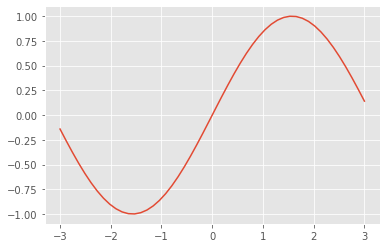

In [4]:
x = np.linspace(-3,3); 
## create an array from -3 to 3. 
y = np.sin(x); 


plt.plot(x,y) # plot x versus y
plt.show() ## display the plot 

## Plot $x, x^{2}, x^{3}, ...$ in $\log-\log$ scale

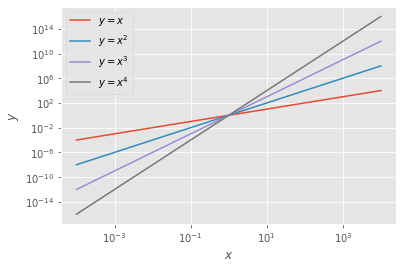

In [5]:
def func(x,n):
    output = x**n; 
    return output


x = np.logspace(-4,4); 
## Create an array of x from 10^-4 to 10^4; 

pow1 = func(x, 1); 
pow2 = func(x,2); 
pow3 = func(x,3); 
pow4 = func(x,4); 


plt.plot(x,pow1, label = '$y = x$'); ## plot y = x
plt.plot(x,pow2, label = '$y = x^2$'); ## plot y = x^2
plt.plot(x,pow3, label = '$y = x^3$'); ## plot y = x^3
plt.plot(x,pow4, label = '$y = x^4$'); ## plot y = x^4

## legend

plt.legend()

## set log scale for x axis
plt.xscale('log');
plt.yscale('log'); ## set log scale for y axis 

plt.xlabel("$x$");
plt.ylabel("$y$");

## display the plot
plt.show()


#### Make histogram plot

/Users/lephuongdong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


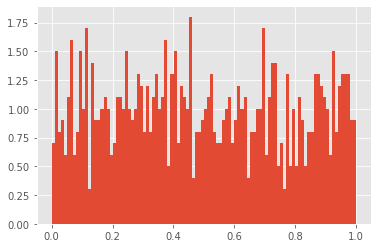

In [6]:
N = 1*10**3 ## Size of R
np.random.seed(0); ## Initialize of the random number generator; 
R = np.random.rand(N); 

### plot the normalized histogram of R using 100 bins: 

plt.hist(R, bins  = 100,normed = True); 
plt.show(); ## display the plot

### Trajectory Plot, position (step)

#### Code example

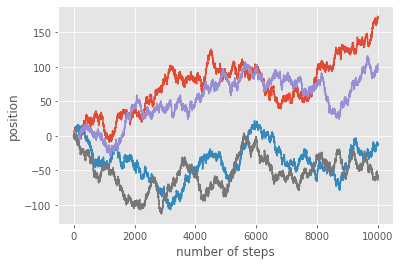

In [7]:
Nstep = 10000; ## number of random steps; 

plt.xlabel('number of steps'); 
plt.ylabel('position'); 

for n in range(4): ## Generate 4 random walks
    ## initialize the random step generator with different seeds
    np.random.seed(n); 
    step = np.random.choice([-1,1], Nstep);  
    ## random sequencies of Nstep +1/-1 steps 
    ## calculate the position of randomwalk at each step. 
    
    position = np.cumsum(step); 
    plt.plot(position) ## plot position (step) v. step

### Euler Method of Numerical Integration: 

#### First Order Ordinary Differential Equation: 

$$
\frac{dy(t)}{dt} = f(y(t), t) ; \quad y(t_0) = y_0
$$

* Equation of Euler Numerical Integration:  


$$
y_{i+1} = y_{i} + \int_{t_i}^{t_{i+1}} dt' f(y(t'), t')  = y_i + \int_{0}^{\Delta t} d\tau (f(t_i + \tau), t_i + \tau) \approx  y_i + \Delta t f_i 
$$

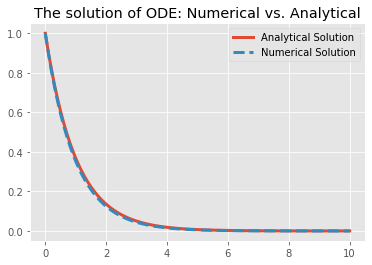

In [8]:
import numpy as np; 
import matplotlib.pyplot as plt; 
plt.style.use('ggplot');
dt = 0.1; 
tmin = 0; 
tmax = 10; 

step = int((tmax-tmin)/dt); 


## Create array to store values: 
t = np.linspace(tmin,tmax, step); 
y = np.zeros(step); 
ya = np.exp(-t); 
## Plot the analytical solution: 
plt.plot(t, ya, label = 'Analytical Solution', lw = 3); 
y[0] = 1; ## initial condition
## Euler numerical method: 
for i in range(step-1):
    y[i+1] = y[i] + dt*(-y[i]);

plt.plot(t, y, label = "Numerical Solution", lw = 3, ls ='--'); 
plt.legend(); 
plt.title('The solution of ODE: Numerical vs. Analytical')
plt.show();

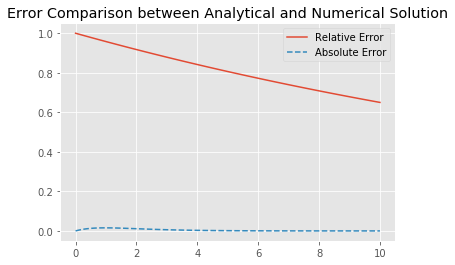

In [9]:
import pandas as pd; 

RelErr = np.zeros(step);
AbErr = np.zeros(step); 
for i in range(step): 
    RelErr[i] = y[i]/ya[i];
    AbErr[i] = abs(y[i]-ya[i]); 
    
DataSol = pd.DataFrame({'Time': t ,'ASol': ya, 'NSol': y, 
                        'RelativeError': RelErr, 
                        'AbsoluteError': AbErr}); 

plt.plot(DataSol.Time, DataSol.RelativeError, label = 'Relative Error');
plt.plot(DataSol.Time, DataSol.AbsoluteError, label = 'Absolute Error', ls = '--')
plt.title('Error Comparison between Analytical and Numerical Solution')
plt.legend();
plt.show()


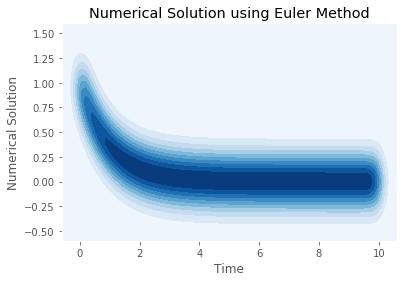

In [12]:
import seaborn as sns; 
sns.kdeplot(DataSol.Time, DataSol.NSol,
            cmap = 'Blues', 
            shade = True, bw = 0.20);
plt.title('Numerical Solution using Euler Method'); 
plt.xlabel('Time'); 
plt.ylabel('Numerical Solution');

## 4. Simulating a damped harmonic oscillator: 


#### Model System: 

$$
\frac{d \mathbf{R}(t)}{dt } = \mathbf{V}(t) \tag{1}
$$

$$
m \frac{d \mathbf{V}(t)}{dt } = - \zeta \mathbf{V}(t) - k \mathbf{R}(t) \tag{2}
$$

* Spring constant: $k$

* Particle mass: $m$

* Friction constant: $\zeta$

* Particle position: $\mathbf{R}(t)$

* Particle Velocity: $\mathbf{V}(t)$

* Friction force: $-\zeta V(t)$

* Spring force: $-k \mathbf{R}(t)$



### Computer Simulation

In [13]:
import numpy as np; 
import matplotlib.pyplot as plt; 
import matplotlib.animation as animation; 

plt.style.use('ggplot')

In [20]:
dim = 2; ## System dimension (x,y)
nums = 100; ## number of steps; 

R = np.zeros(dim); # particle position 
V = np.zeros(dim); # particle velocity

Rs = np.zeros([dim, nums]); # particle position at all steps
Vs = np.zeros([dim, nums]); # particle velocity at all steps

Et = np.zeros(nums) ## total energy of  the system at all steps. 
time = np.zeros(nums) ## time at all steps. 


### Define the plotting function

In [21]:
def init():
    ## initialize animation
    particles.set_data([],[])
    line.set_data([],[])
    title.set_text(r'')
    return particles,line,title

### Euler Scheme

In [27]:
def animate(i, type = "harm"):
    global R,V,F,Rs,Vs,time,Et
    if type == "aharm":
        F_spring = -k**R *np.linalg.norm(R)**2
        E_spring_aharm = 0.5*np.linalg.norm(R)**2
    else: 
        F_spring = -k*R
        E_spring_aharm = 1
        
    V = V*(1-zeta/m*dt) + dt/m*F_spring
    R = R + V*dt
    Rs[0:dim,i]=R
    Vs[0:dim,i]=V
    time[i]=i*dt
    Et[i]=0.5*m*np.linalg.norm(V)**2 + 0.5*k*np.linalg.norm(R)**2 * E_spring_aharm
    particles.set_data(R[0], R[1])
    line.set_data(Rs[0,0:i], Rs[1,0:i])
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt,Et[i]))
    return particles,line,title    

### Parameters

In [28]:
## particle, mass, friction 
m, k, zeta = 1.0, 1.0, 0.0
## Initial conditions: 
R[0], R[1] = 1., 1.
V[0], V[1] = 1., 0.
dt = 0.1*np.sqrt(k/m)

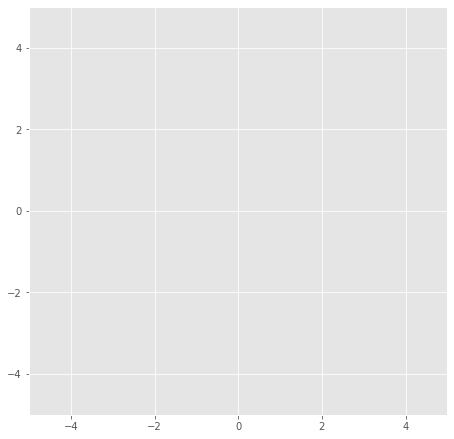

In [31]:
params_model = ("harm", )
box = 10

fig, ax = plt.subplots(figsize=(7.5,7.5)) ## Figure size
ax = plt.axes(xlim=(-box/2,box/2),
              ylim=(-box/2,box/2))
particles, = ax.plot([],[],
                     'ko', 
                     ms=10) 
line, =ax.plot([],[],
              lw=1)
title=ax.text(0.5,1.05,r'',
              transform=ax.transAxes,
              va='center') 

## draw animation
anim=animation.FuncAnimation(fig,animate,
                             init_func=init,
                                frames=nums,
                                 interval=5,
                                 blit=False,
                                 repeat=False,
                                    fargs = params_model)

## Simulation Results: Analysis

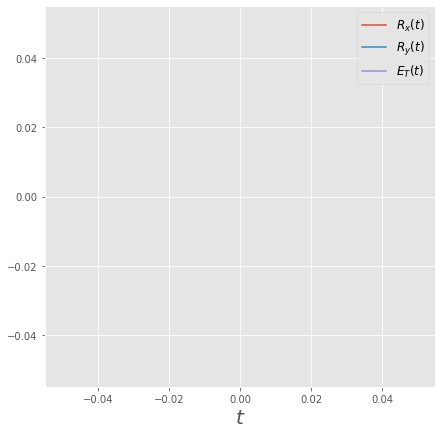

In [30]:
fig, ax = plt.subplots(figsize = (7,7)); 

ax.set_xlabel(r"$t$", fontsize = 20); 
ax.plot(time, Rs[0]) ## plot R_x(t)
ax.plot(time, Rs[1]) ## plot Ry(t) 
ax.plot(time, Et) ## plot the total energy

ax.legend([r'$R_x(t)$', r'$R_y(t)$', r'$E_T(t)$'], fontsize = 12); 
plt.show()

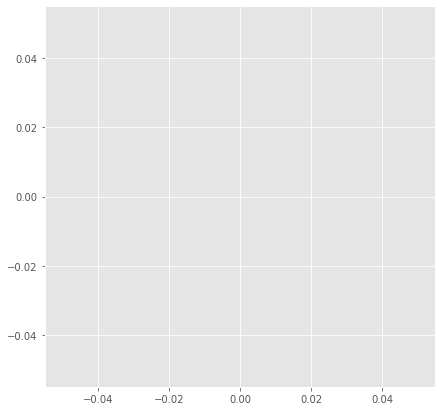

In [26]:
fig,ax = plt.subplots(figsize = (7,7)); 
ax.plot(Rs[0,0:nums], Rs[1,0:nums]) ## parametric plot Rx and Ry; 
plt.show()

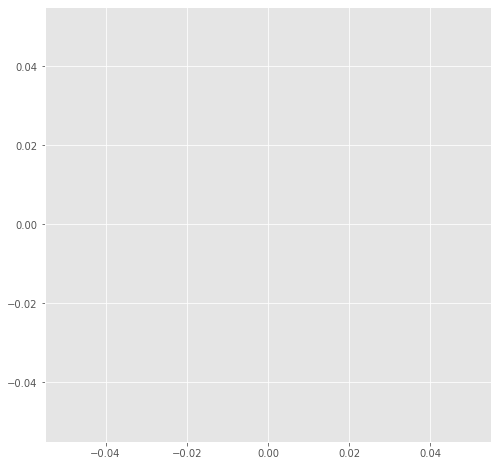

In [17]:
fig,ax = plt.subplots(figsize = (8,8)); 
ax.plot(Vs[0, 0:nums], Vs[1,0:nums]); 
plt.show()

$$\log N!\simeq N\log N - N $$

\[ \log N!\simeq N\log N - N \]

\begin{equation}
\log N!\simeq N\log N - N
\end{equation}

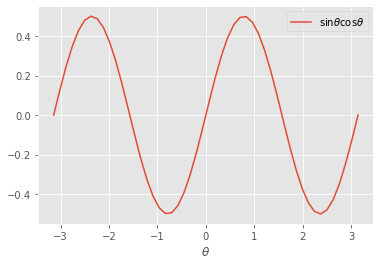

In [13]:
x = np.linspace(-np.pi,np.pi) ##fix
y = np.sin(x)*np.cos(x) ## fix
plt.plot(x,y)
plt.xlabel(r"$\theta$")
plt.legend([r'$\sin\theta\cos\theta$'])
plt.show()

## Homework 1


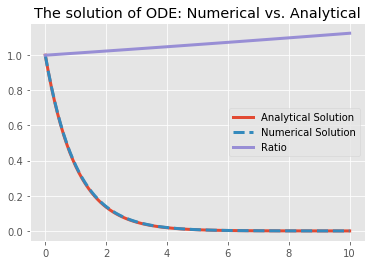

In [37]:
import numpy as np; 
import matplotlib.pyplot as plt; 
plt.style.use('ggplot');
dt = 0.1; 
tmin = 0; 
tmax = 10; 

step = int((tmax-tmin)/dt); 


## Create array to store values: 
t = np.linspace(tmin,tmax, step); 
y = np.zeros(step); 
ya = np.exp(-t); 
## Plot the analytical solution: 
plt.plot(t, ya, label = 'Analytical Solution', lw = 3); 
y[0] = 1; ## initial condition
y1 = np.zeros(step);


for i in range(step-1):
    y1[i] = y[i] - 0.5*dt*y[i]
    y[i+1]= y[i] - dt*y1[i]
    
plt.plot(t, y, label = "Numerical Solution", lw = 3, ls ='--'); 
plt.plot(t,y/ya,lw=3,label='Ratio');
plt.legend(); 
plt.title('The solution of ODE: Numerical vs. Analytical')
plt.show();